<a href="https://colab.research.google.com/github/justinphan/Principal-Component-Analysis/blob/master/Crime-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# pandas==0.19.2, scikit-learn==0.18.1, numpy==1.11.3

np.set_printoptions(formatter={'float': '{: .4f}'.format},
                     threshold=np.inf)
usarrests = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/justinphan/Files/master/USArrests.csv', index_col=0)
usarrests.head()
#print(usarrests)
print('\nHeaders:\n', usarrests.columns.values.tolist())
print('\nMean:\n', usarrests.mean(axis = 0))
print('\nVariance:\n', usarrests.var(axis = 0))



Headers:
 ['Murder', 'Assault', 'UrbanPop', 'Rape']

Mean:
 Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

Variance:
 Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64



Variance after scaling:
 Murder      1.0
Assault     1.0
UrbanPop    1.0
Rape        1.0
dtype: float64

n_components = 4
Rotation matrix:
 [[ 0.5359  0.4182 -0.3412  0.6492]
 [ 0.5832  0.1880 -0.2681 -0.7434]
 [ 0.2782 -0.8728 -0.3780  0.1339]
 [ 0.5434 -0.1673  0.8178  0.0890]]
Explained ratio:
 [ 0.6201  0.2474  0.0891  0.0434]
Accumulated ratio: 1.0000

n_components = 2
Rotation matrix:
 [[ 0.5359  0.4182]
 [ 0.5832  0.1880]
 [ 0.2782 -0.8728]
 [ 0.5434 -0.1673]]
Explained ratio:
 [ 0.6201  0.2474]
Accumulated ratio: 0.8675
original shape:    (50, 4)
transformed shape: (50, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


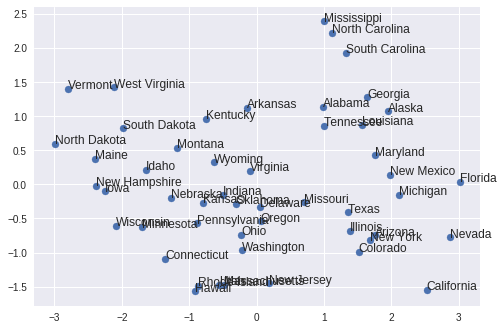

In [0]:
# By default, pandas var() and std() are unbiased, normallized by N-1.
import matplotlib.pyplot as plt

usarr_scaled = pd.DataFrame(scale(usarrests), columns=usarrests.columns)
print('\nVariance after scaling:\n', 
      usarr_scaled.var(axis = 0, ddof = 0))
# To have unit variance, we need to add ddof = 0, 
# meaning normallized by N

# n_components = 4 (maximum number)
pca = PCA(n_components = 4)
pca.fit(usarr_scaled)
print('\nn_components = 4')
print('Rotation matrix:\n', pca.components_.T)
print('Explained ratio:\n', pca.explained_variance_ratio_)
print('Accumulated ratio: %.4f' %pca.explained_variance_ratio_.sum())

# n_components = 3
pca = PCA(n_components = 2)
pca.fit(usarr_scaled)
print('\nn_components = 2')
print('Rotation matrix:\n', pca.components_.T)
print('Explained ratio:\n', pca.explained_variance_ratio_)
print('Accumulated ratio: %.4f' %pca.explained_variance_ratio_.sum())
X_pca = pca.transform(usarr_scaled)
print("original shape:   ", usarr_scaled.shape)
print("transformed shape:", X_pca.shape)
#print(X_pca)
#X_new = pca.inverse_transform(X_pca)
#print(X_new)

# plt.scatter(usarr_scaled[:, 0], usarr_scaled[:, 1], alpha=0.2)
# plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
# plt.axis('equal');
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1])

# print(usarrests.index.tolist())

for i, txt in enumerate(usarrests.index.tolist()):
   ax.annotate(txt, (X_pca[:, 0][i], X_pca[:, 1][i]))
#print(usarrests.index)
